구글 코랩을 통해 데이터 호출 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
dpath = "/content/drive/MyDrive/data/hand_gesture_data/"

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

In [ ]:
train = pd.read_csv(dpath+'train.csv')
test = pd.read_csv(dpath+'test.csv')

In [ ]:
X = train.iloc[:, 1:-1] # 행 전체, id를 제외하고 칼럼 전부 불러오기
target = test.iloc[:, 1:] 

In [ ]:
print(X.shape)
print(target.shape)

(2335, 32)
(9343, 32)


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_1   2335 non-null   float64
 1   sensor_2   2335 non-null   float64
 2   sensor_3   2335 non-null   float64
 3   sensor_4   2335 non-null   float64
 4   sensor_5   2335 non-null   float64
 5   sensor_6   2335 non-null   float64
 6   sensor_7   2335 non-null   float64
 7   sensor_8   2335 non-null   float64
 8   sensor_9   2335 non-null   float64
 9   sensor_10  2335 non-null   float64
 10  sensor_11  2335 non-null   float64
 11  sensor_12  2335 non-null   float64
 12  sensor_13  2335 non-null   float64
 13  sensor_14  2335 non-null   float64
 14  sensor_15  2335 non-null   float64
 15  sensor_16  2335 non-null   float64
 16  sensor_17  2335 non-null   float64
 17  sensor_18  2335 non-null   float64
 18  sensor_19  2335 non-null   float64
 19  sensor_20  2335 non-null   float64
 20  sensor_2

In [ ]:
X.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,...,-6.066648,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,...,14.906205,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,...,4.948570,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,...,14.048298,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,...,-6.051674,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846


In [ ]:
target.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


Id 컬럼 제거 및, boxplot을 통해 데이터 분포 확인  

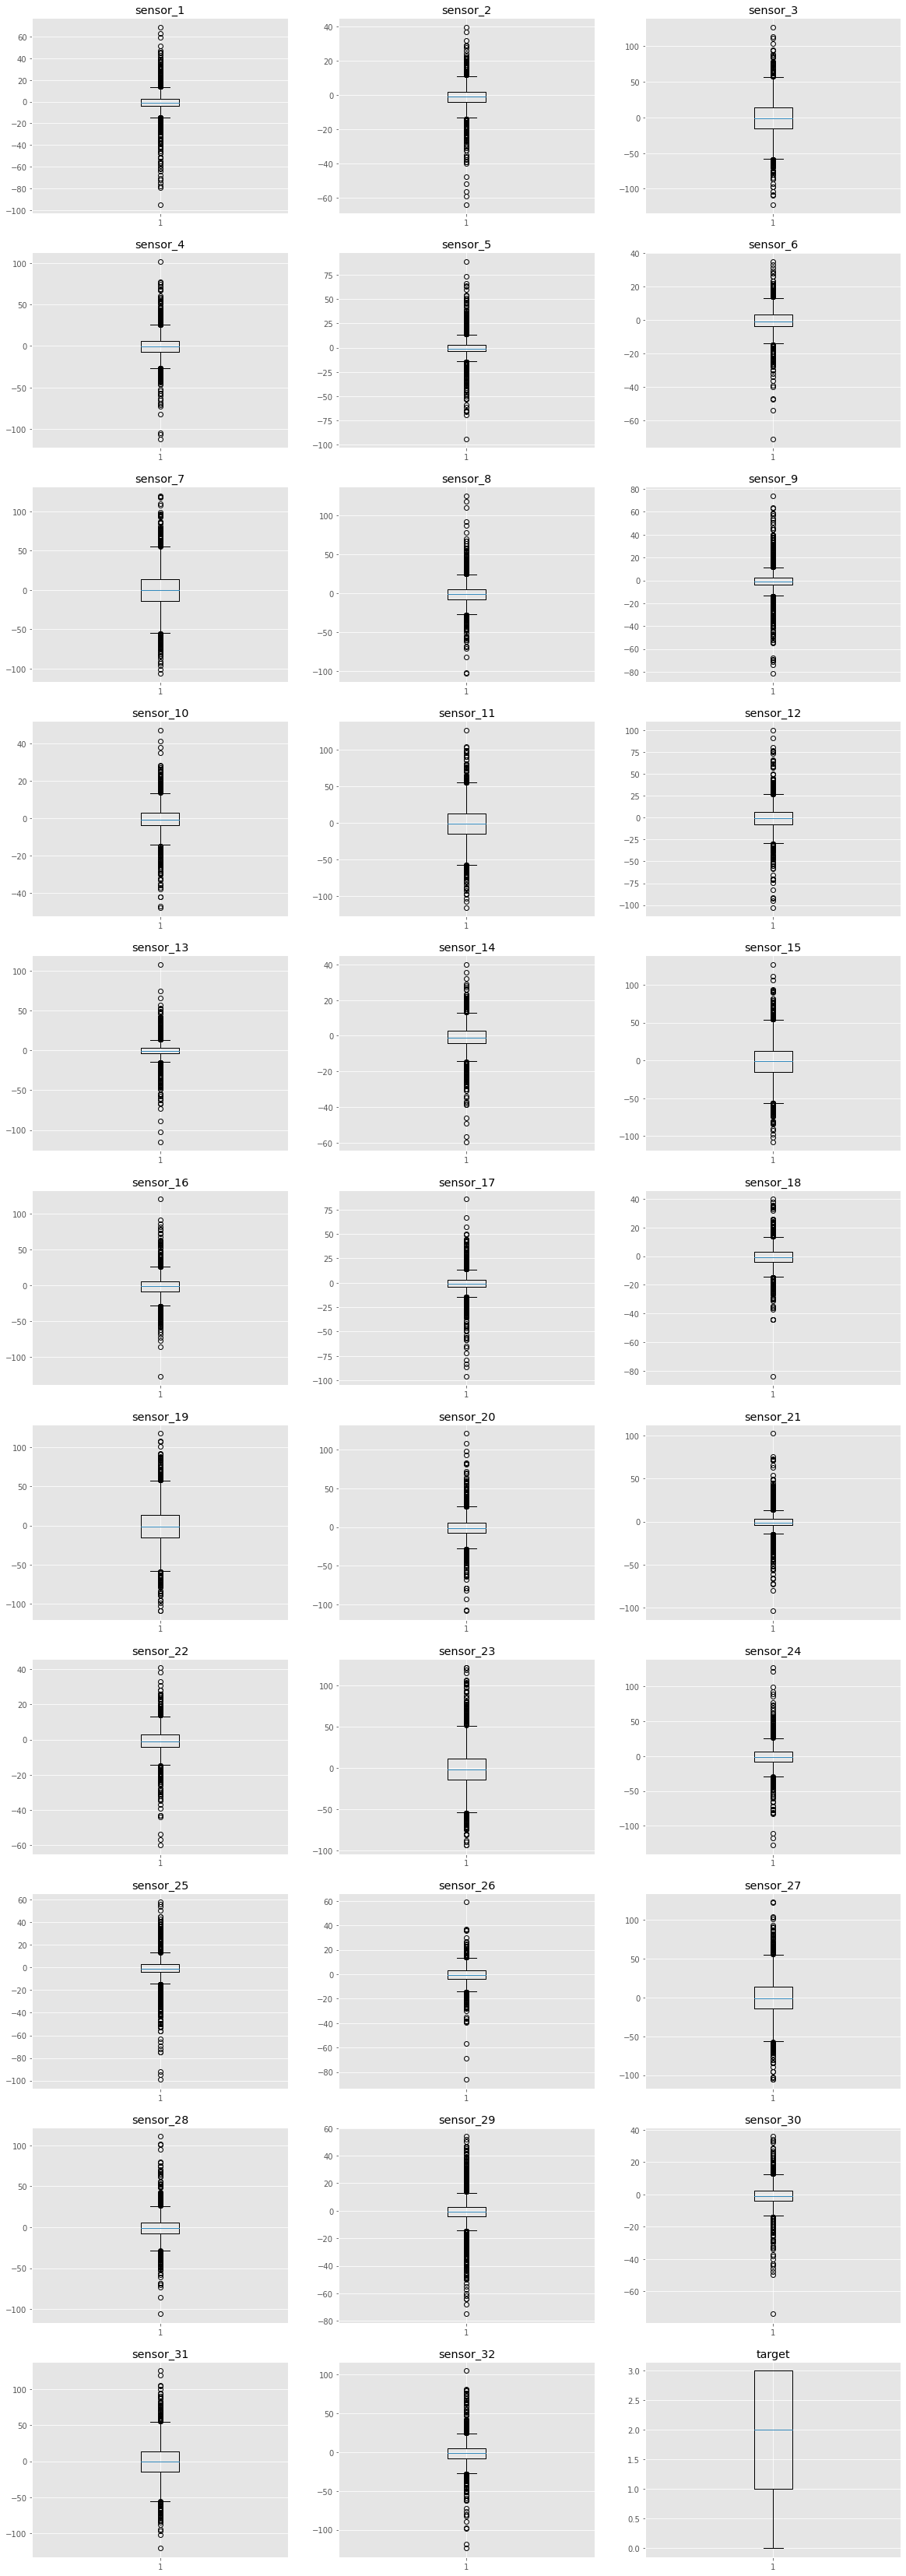

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = train.columns[1:]

plt.figure(figsize=(20,60))

for i in range(len(feature)):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.boxplot(train[feature[i]])
plt.show()

컨볼루션 인공 신경망에 적합하게 데이터 행렬 변경

In [ ]:
X = np.array(X).reshape(-1, 8, 4, 1)
target = np.array(target).reshape(-1, 8, 4, 1)

In [ ]:
train.target.value_counts()

3    599
2    593
1    574
0    569
Name: target, dtype: int64

In [ ]:
X.shape

(2335, 8, 4, 1)

In [ ]:
ohe = OneHotEncoder(sparse = False) 
y = ohe.fit_transform(train[['target']])

In [ ]:
y.shape

(2335, 4)

Kfold, 얼리 스토핑, 콜백 함수 설정

In [ ]:
skf = StratifiedKFold(n_splits = 10, random_state = 5, shuffle = True)
ea = EarlyStopping(monitor = 'val_acc', patience = 50, mode = 'max', verbose = 0)
rlrp = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, mode='max')

모델 적합

In [ ]:
cnn_acc = []
cnn_pred = np.zeros((target.shape[0], 4))
for i, (tr_idx, val_idx) in enumerate(skf.split(X, train.target)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = X[tr_idx], y[tr_idx]
    val_x, val_y = X[val_idx], y[val_idx]


    cnn = Sequential()
    cnn.add(Conv2D(64, (2, 4), padding = "same", activation = 'elu', input_shape = (8, 4, 1))) # 정사각필터보다 직사각필터가 좋은 성능
    cnn.add(BatchNormalization())

    cnn.add(Conv2D(32, (2, 4), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())

    cnn.add(Conv2D(16, (3, 4), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())

    cnn.add(GlobalAveragePooling2D())
    cnn.add(Dense(16, activation = 'relu'))
    cnn.add(Dense(4, activation = 'softmax'))

    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
    cnn.compile(optimizer = RMSprop(lr=0.04), loss = 'categorical_crossentropy', metrics = ['acc'])
    
    cnn.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 100, batch_size = 32, callbacks = [ea, mc, rlrp], verbose = 0)
    best = load_model(f'model_{i + 1}.h5')
    val_pred = best.predict(val_x)
    val_cls = np.argmax(val_pred, axis = 1)
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of CNN = {fold_cnn_acc}\n')
    fold_pred = best.predict(target) / skf.n_splits
    cnn_pred += fold_pred

1 Fold Training.....
1 Fold ACC of CNN = 0.9017094017094017

2 Fold Training.....
2 Fold ACC of CNN = 0.8675213675213675

3 Fold Training.....
3 Fold ACC of CNN = 0.8846153846153846

4 Fold Training.....
4 Fold ACC of CNN = 0.9017094017094017

5 Fold Training.....
5 Fold ACC of CNN = 0.8675213675213675

6 Fold Training.....
6 Fold ACC of CNN = 0.8969957081545065

7 Fold Training.....
7 Fold ACC of CNN = 0.8669527896995708

8 Fold Training.....
8 Fold ACC of CNN = 0.8755364806866953

9 Fold Training.....
9 Fold ACC of CNN = 0.8841201716738197

10 Fold Training.....
10 Fold ACC of CNN = 0.8669527896995708



In [ ]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 8, 4, 64)          576       
                                                                 
 batch_normalization_27 (Bat  (None, 8, 4, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 4, 32)          16416     
                                                                 
 batch_normalization_28 (Bat  (None, 8, 4, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 4, 16)          6160      
                                                                 
 batch_normalization_29 (Bat  (None, 8, 4, 16)        

In [ ]:
np.mean(cnn_acc)

0.8813634862991085

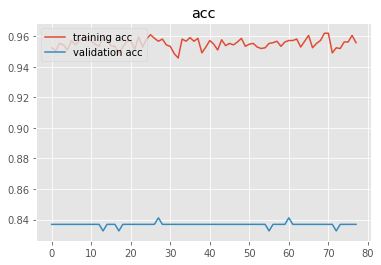

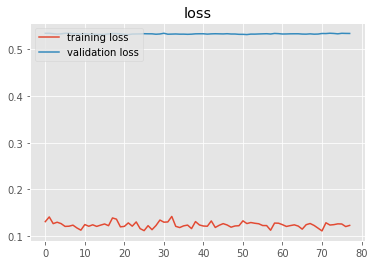

In [ ]:
#acc
history = cnn.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 100, batch_size = 32, callbacks = [ea, mc], verbose = 0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training acc', 'validation acc'], loc = 'upper left')
plt.title("acc")
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper left')
plt.title("loss")
plt.show()

# 과적합이 일어났다 .. 